# Классификация - и снова в бой!


Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основные методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, необходимой предобработки, feature engineering и поиск лучшего варианта, который даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

In [82]:
# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

TEXT_COLOR = "black"

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["text.color"] = TEXT_COLOR
plt.rcParams["font.size"] = 14
plt.rcParams["lines.markersize"] = 15
plt.rcParams["axes.labelcolor"] = TEXT_COLOR
plt.rcParams["xtick.color"] = TEXT_COLOR
plt.rcParams["ytick.color"] = TEXT_COLOR

sns.set_style("darkgrid")

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [83]:
# Если вы откроете файл в первый раз и посмотрите на данные - вы увидите, что колокна Id содержит только уникальные числовые значения, а значит - прямой кандидат на индексную колонку
file_path = "../../heart_cleveland_upload.csv"
df_src = pd.read_csv(file_path)

In [84]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [85]:
df_src

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [86]:
df_src.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

- age: возраст в годах
- sex: пол (1 = мужской; 0 = женский)
- cp: тип боли в груди
    - Значение 0: типичная стенокардия
    - Значение 1: атипичная стенокардия
    - Значение 2: неангинальная боль
    - Значение 3: бессимптомная
- trestbps: артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)
- chol: сывороточный холестерин в мг/дл
- fbs: (уровень сахара в крови натощак > 120 мг/дл) (1 = правда; 0 = ложь)
- restecg: результаты электрокардиографии в состоянии покоя
    - Значение 0: норма
    - Значение 1: наличие аномалии зубца ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ)
    - Значение 2: указание на вероятную или определенную гипертрофию левого желудочка по критериям Эстеса
- thalah: максимальная достигнутая частота сердечных сокращений
- exang: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
- oldpeak = депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- slope: наклон пикового сегмента ST нагрузки
    - Значение 0: восходящий
    - Значение 1: плоский
    - Значение 2: нисходящий
- ca: количество крупных сосудов (0-3), окрашенных флюороскопией
- thal: 0 = нормальный; 1 = фиксированный дефект; 2 = обратимый дефект
- состояние: 0 = нет заболевания, 1 = заболевание

In [87]:
df_src["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

Переведем название классов condition из 0-1 в болен-здоров для упрощения анализа данных.

In [88]:
df_src_category = df_src.copy()
disease_categories = pd.DataFrame(df_src_category["condition"], columns=["condition"])
disease_categories[disease_categories["condition"] == 1] = "disease"
disease_categories[disease_categories["condition"] == 0] = "no_disease"
disease_categories = disease_categories.astype("category")
df_src_category["condition"] = disease_categories["condition"]
df_src_category.head()
# И посмотрим типы теперь:
df_src_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        297 non-null    int64   
 1   sex        297 non-null    int64   
 2   cp         297 non-null    int64   
 3   trestbps   297 non-null    int64   
 4   chol       297 non-null    int64   
 5   fbs        297 non-null    int64   
 6   restecg    297 non-null    int64   
 7   thalach    297 non-null    int64   
 8   exang      297 non-null    int64   
 9   oldpeak    297 non-null    float64 
 10  slope      297 non-null    int64   
 11  ca         297 non-null    int64   
 12  thal       297 non-null    int64   
 13  condition  297 non-null    category
dtypes: category(1), float64(1), int64(12)
memory usage: 30.7 KB


In [89]:
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)


class EvaluateClassificationModel:
    def __init__(
        self,
        df: pd.DataFrame,
        target: str,
        logreg_model: LogisticRegression,
    ) -> None:
        self._df = df.copy()
        self._df_train_data, self._df_test_data = train_test_split(
            self._df,
            test_size=0.3,
            random_state=RANDOM_SEED,
            shuffle=True,
            stratify=df[target],
        )
        df_x = self._df_train_data.copy()
        self._df_test_x = self._df_test_data.copy()

        y_train = df_x.pop(target)
        self._y_test = self._df_test_x.pop(target)

        self.target_enc = LabelEncoder()
        self.target_enc.fit(y_train)

        y_train_enc = self.target_enc.transform(y_train)
        self.y_test_enc = self.target_enc.transform(self._y_test)

        self.logreg = logreg_model
        self.logreg.fit(df_x, y_train_enc)
        self._y_pred = self.logreg.predict(self._df_test_x)

    def print_report(self) -> None:
        print(
            classification_report(
                self.y_test_enc,
                self._y_pred,
                target_names=self.target_enc.classes_,
            )
        )

    def get_confusion_matrix(self) -> np.ndarray:
        return confusion_matrix(self.y_test_enc, self._y_pred)

    def disp_confusion_matrix(self) -> None:
        cm = self.get_confusion_matrix()
        disp = ConfusionMatrixDisplay(cm, display_labels=self.target_enc.classes_)
        disp.plot()
        plt.grid(False)
        plt.show()

Создадим baseline модель

              precision    recall  f1-score   support

     disease       0.92      0.81      0.86        42
  no_disease       0.85      0.94      0.89        48

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90



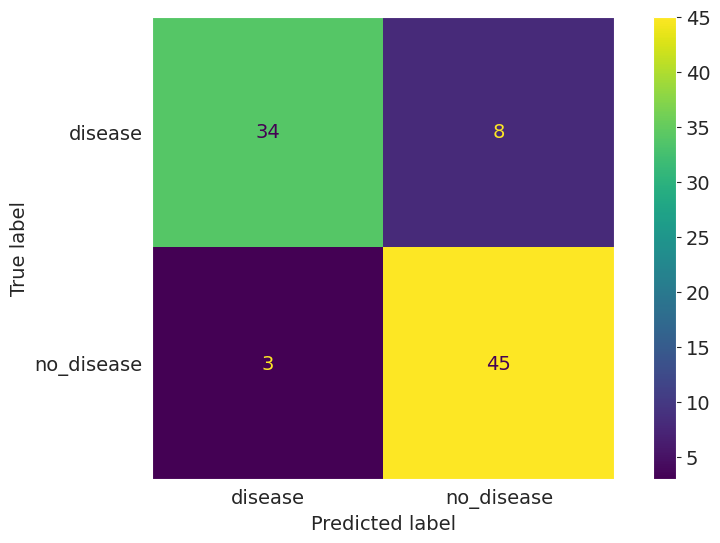

In [90]:
baseline_model = EvaluateClassificationModel(
    df=df_src_category,
    target="condition",
    logreg_model=LogisticRegression(random_state=RANDOM_SEED, max_iter=1000),
)
baseline_model.print_report()
baseline_model.disp_confusion_matrix()

Как видно из отчета средние значения recall и precision примерно одинаковы, а по каждому классу отличаются. При этом recall класса no_disease выше. Важно понимать что в нашей работе важно не пропустить истинно больного человека, а это значит что полнота предсказания положительного класса (в нашем случае disease) - recall должна быть максимальной.

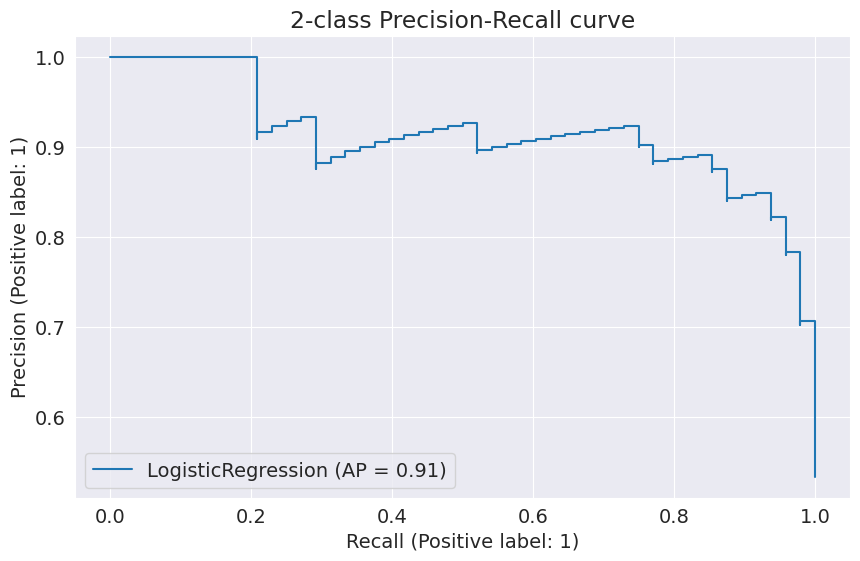

In [91]:
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    baseline_model.logreg,
    baseline_model._df_test_x,
    baseline_model.y_test_enc,
)

plt.title("2-class Precision-Recall curve")
plt.show()

AUC = 0.91 Было бы хорошо "прижать" эту кривую к правому верхнему углу для увеличения этого параметра.

Посмотрим на данные

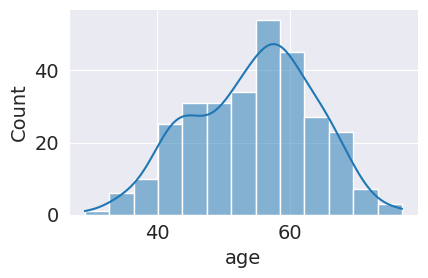

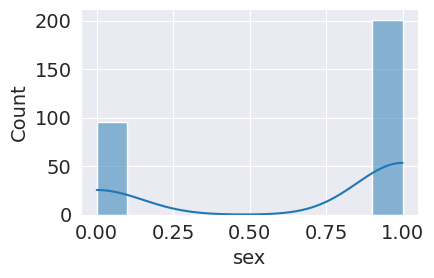

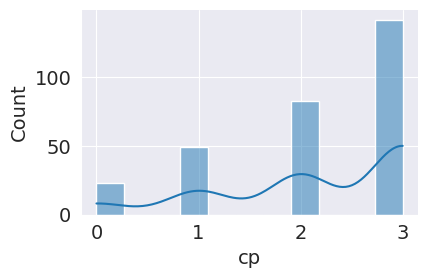

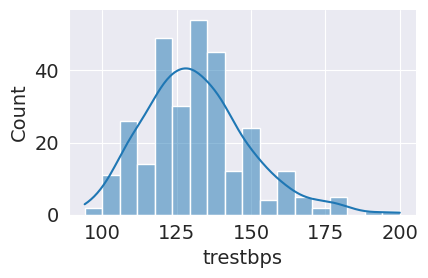

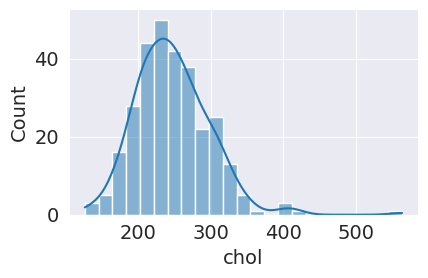

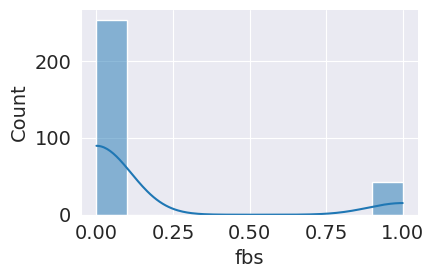

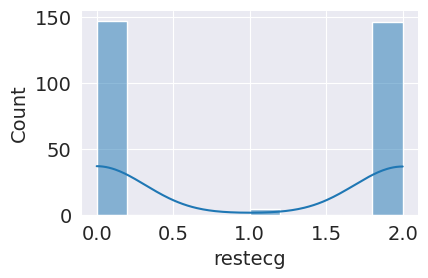

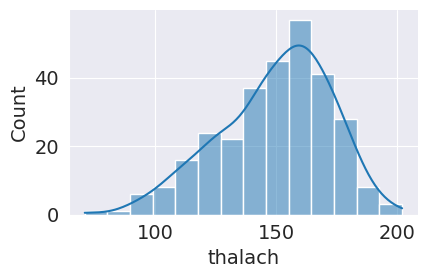

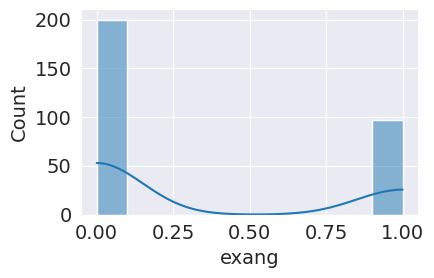

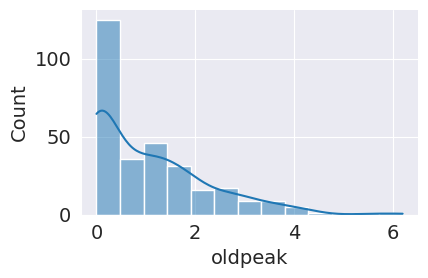

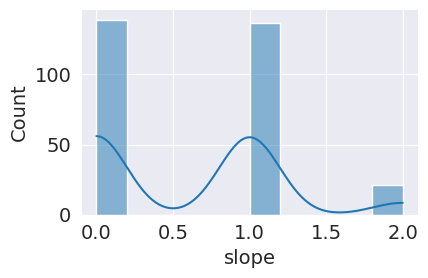

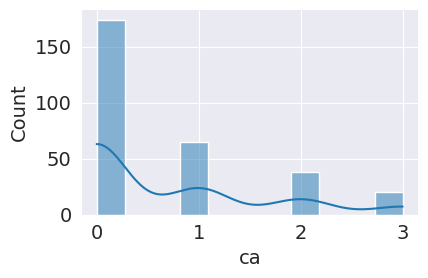

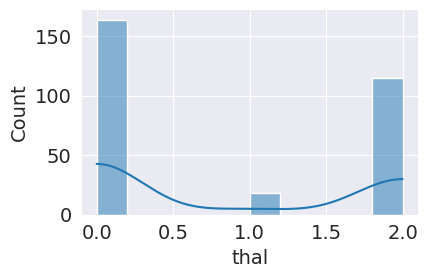

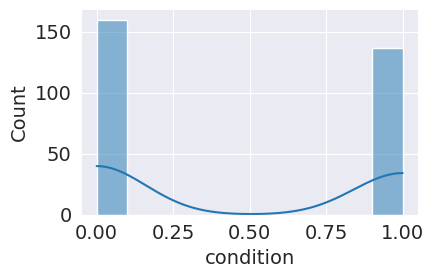

In [92]:
for column in df_src.columns:
    sns.displot(df_src[column], kde=True, height=3, aspect=1.5)
    plt.show()

thal       0.520516
ca         0.463189
oldpeak    0.424052
thalach    0.423817
exang      0.421355
Name: condition, dtype: float64


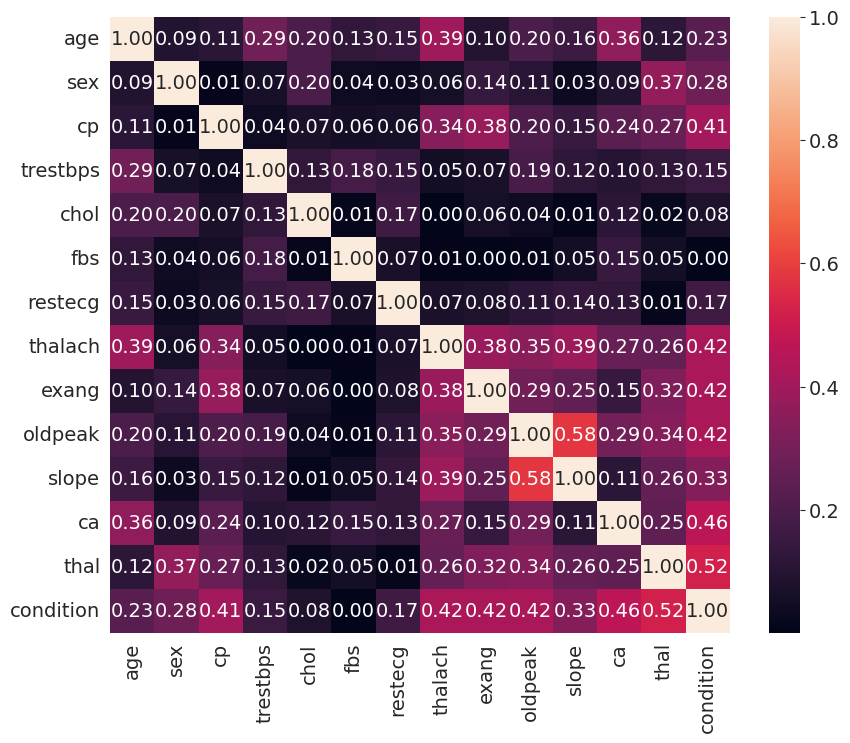

In [93]:
correlation_mtrx = abs(df_src.corr())
print(
    correlation_mtrx["condition"].sort_values(ascending=False)[1:6]
)  # пять наиболее коррелирующих признаков с целевым
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mtrx, annot=True, fmt=".2f")
plt.show()

Попробуем обучить модель на пяти наиболее коррелирующих с целевым признаках.

              precision    recall  f1-score   support

     disease       0.92      0.81      0.86        42
  no_disease       0.85      0.94      0.89        48

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90

              precision    recall  f1-score   support

     disease       0.87      0.79      0.82        42
  no_disease       0.83      0.90      0.86        48

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



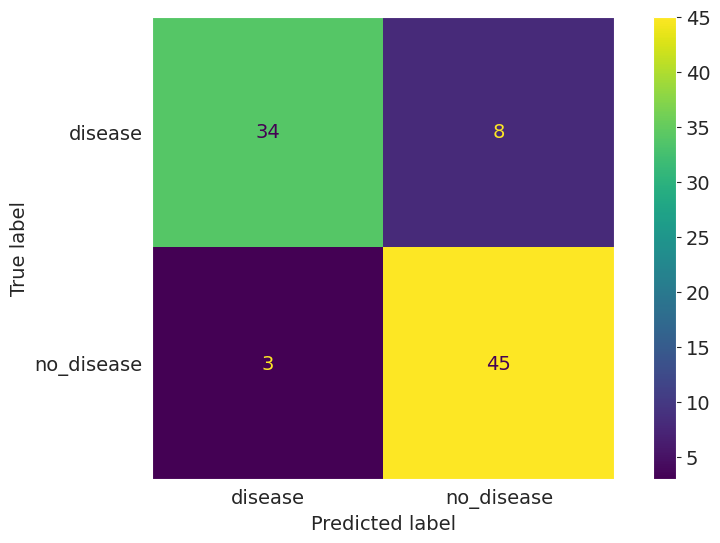

In [94]:
categories = [
    "thal",
    "ca",
    "oldpeak",
    "thalach",
    "exang",
    "condition",
]
df = df_src_category[categories]
model_1 = EvaluateClassificationModel(
    df=df,
    target="condition",
    logreg_model=LogisticRegression(random_state=RANDOM_SEED, max_iter=1000),
)
baseline_model.print_report()
model_1.print_report()
baseline_model.disp_confusion_matrix()

Результаты ухудшились. Попробуем другой способ.

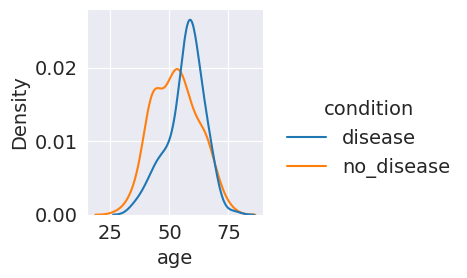

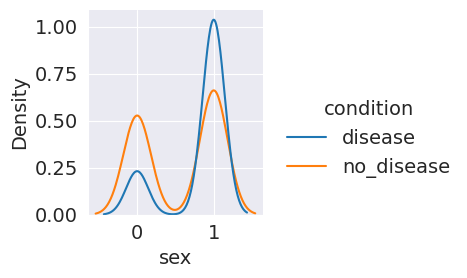

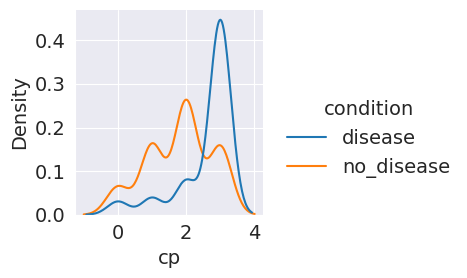

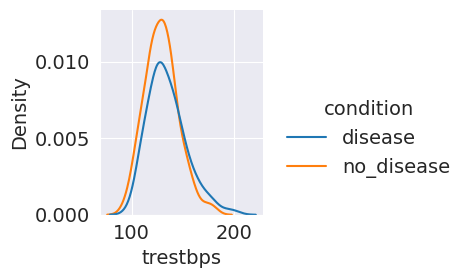

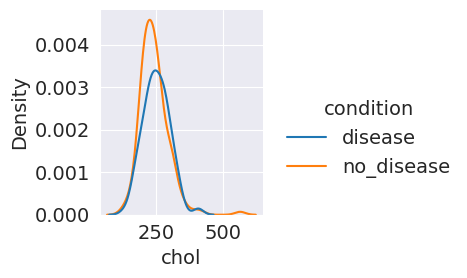

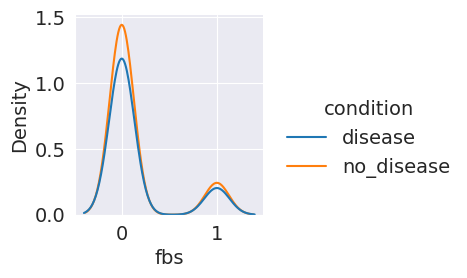

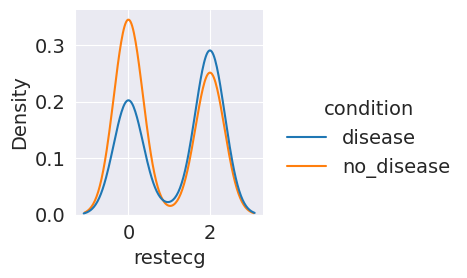

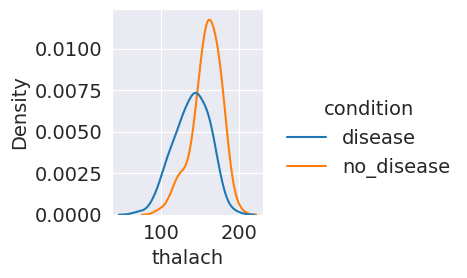

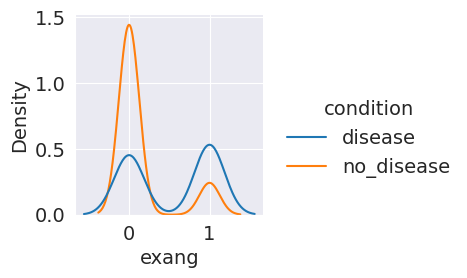

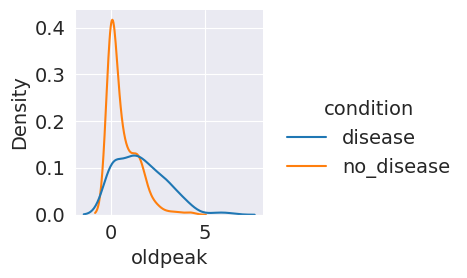

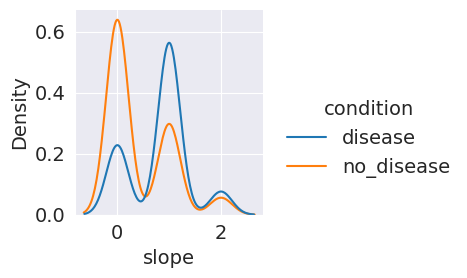

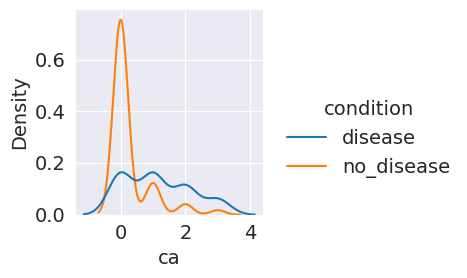

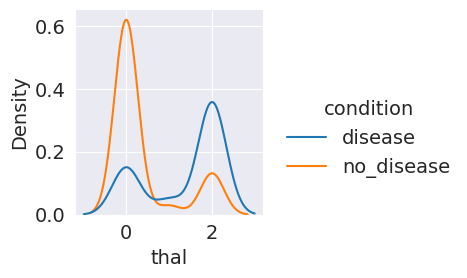

In [95]:
for column in df_src_category.columns:
    if column == "condition":
        continue
    sns.displot(df_src_category, x=column, hue="condition", kind="kde", height=3)
    plt.show()

In [96]:
# exclude = ["condition", "sex","cp", "fbs", "exang", "ca", "thal"]
# for column in df_src_category.columns:
#     if column in exclude:
#         continue
#     sns.boxplot(data=df_src_category, y=column, x="condition")
#     plt.show()

              precision    recall  f1-score   support

     disease       0.92      0.81      0.86        42
  no_disease       0.85      0.94      0.89        48

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90

              precision    recall  f1-score   support

     disease       0.92      0.79      0.85        42
  no_disease       0.83      0.94      0.88        48

    accuracy                           0.87        90
   macro avg       0.88      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



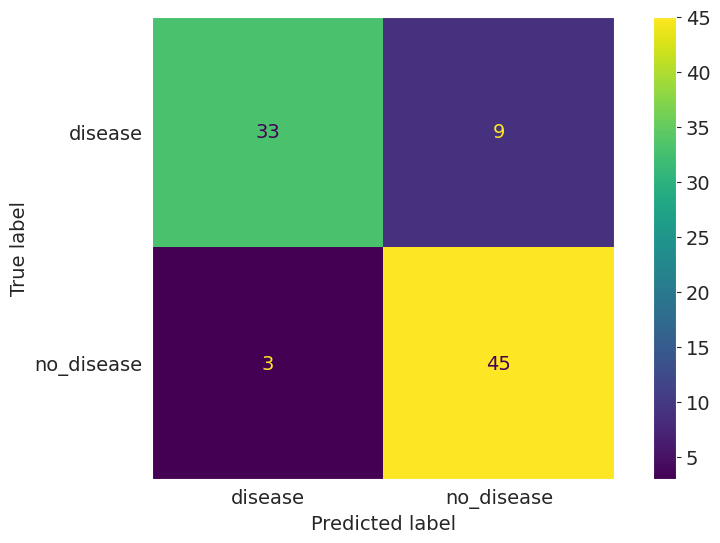

array([[ 0.00734939, -0.64903867, -0.42264554, -0.01769804, -0.00187433,
         0.56034317,  0.02208567, -0.66310887, -0.33078287, -0.77885945,
        -1.06331758, -0.58534724]])

In [100]:
categories = df_src_category.columns.to_list()
# categories.remove("age")
categories.remove("restecg")
# categories.remove("restecg")
df = df_src_category[categories]
model_2 = EvaluateClassificationModel(
    df=df,
    target="condition",
    logreg_model=LogisticRegression(random_state=RANDOM_SEED, max_iter=1000),
)
baseline_model.print_report()
model_2.print_report()
model_2.disp_confusion_matrix()
model_2.logreg.coef_

In [108]:
from sklearn.linear_model import Lasso

df = df_src_category
lasso_model = EvaluateClassificationModel(
    df=df, target="condition", logreg_model=Lasso(alpha=3)
)
weights = lasso_model.logreg.coef_
print(weights)
zero_weights = np.where(np.abs(weights) < 1e-5)[0]
zero_weights = [df_src_category.columns[i] for i in zero_weights]
print(zero_weights)
df_reduced = df_src_category.drop(columns=zero_weights, axis=1)
df_reduced.head()

[-0.         -0.         -0.         -0.         -0.          0.
 -0.          0.00414355 -0.         -0.         -0.         -0.
 -0.        ]
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


,thalach,condition
0,131,no_disease
1,151,no_disease
2,114,no_disease
3,174,disease
4,144,no_disease


              precision    recall  f1-score   support

     disease       0.92      0.81      0.86        42
  no_disease       0.85      0.94      0.89        48

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90

              precision    recall  f1-score   support

     disease       0.82      0.79      0.80        42
  no_disease       0.82      0.85      0.84        48

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



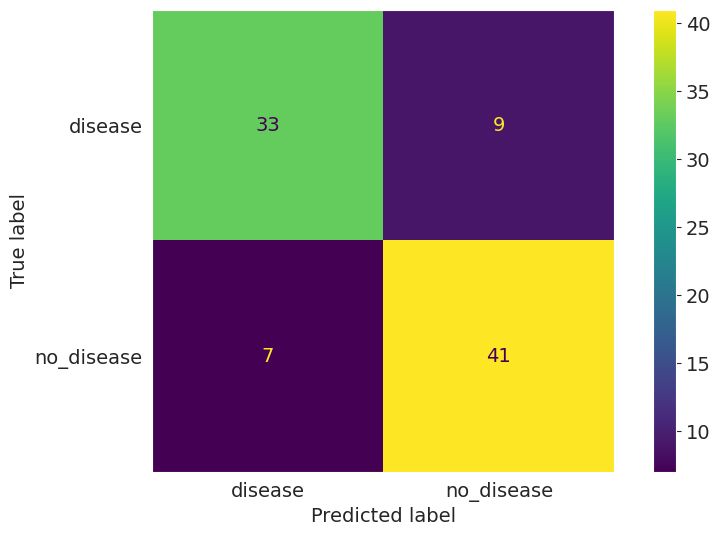

In [99]:
df = df_reduced
model_3 = EvaluateClassificationModel(
    df=df,
    target="condition",
    logreg_model=LogisticRegression(random_state=RANDOM_SEED, max_iter=1000),
)
baseline_model.print_report()
model_3.print_report()
model_3.disp_confusion_matrix()